In [74]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#importing the KAGGLE Red Wine Quality dataset
df = pd.read_csv('indian_liver_patient.csv')
data=df.values
print(type(data))
#finding number of rows and columns
print(data.shape)

<class 'numpy.ndarray'>
(583, 11)


### There are 583 rows and 11 columns in the dataset

In [76]:
### First 10 entries of the dataset
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [77]:
#attributes of dataset
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Description of the attributes

In [7]:
#Age : Age of the patients
#Gender : Sex of the patients
#Total_Bilirubin : Total Billirubin in mg/dL
#Direct_Bilirubin : Conjugated Billirubin in mg/dL
#Alkaline_Phosphotase : ALP in IU/L
#Alamine_Aminotransferase : ALT in IU/L
#Aspartate_Aminotransferase : AST in IU/L
#Total_Protiens : Total Proteins g/dL
#Albumin : Albumin in g/dL
#Albumin_and_Globulin_Ratio : A/G ratio
#Dataset : Label (patient has liver disease (1) or not (2))

In [78]:
#Checking if any attribute is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


No null values are present in dataset. So we don't need to drop any attribute from the original dataset.

In [79]:
# Division of data into 1 and 2 ()
#.countplot(df['Dataset'],label="Count")
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

1 represents patients with liver disease and 2 represents patients with no liver disease.
Out of 583 patients,416 are diagnosed with liver disease and 167 are not diagnosed with liver disease.

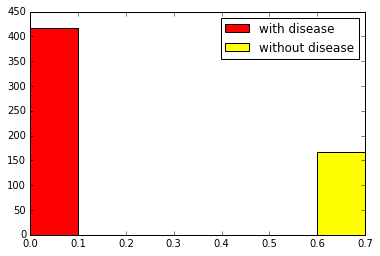

In [80]:
indices1= np.array([0])
count1= np.array([416])
indices2= np.array([0])
count2= np.array([167])
plt.bar(indices1,count1,0.1,color='red',label='with disease')
plt.bar(indices2+0.6,count2,0.1,color='yellow',label='without disease')
plt.legend()
plt.show()

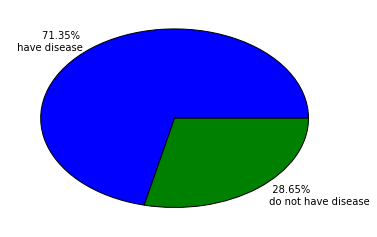

In [81]:
labels = ['71.35% \n have disease','  28.65% \n do not have disease']
values = [416,167]

plt.pie(values,labels=labels,radius=1)
plt.show()


71.35% of the total population has liver disease while 28.65% of the total population does not have liver disease.

In [82]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Albumin_and_Globulin_Ratio    4
dtype: int64

In [83]:
print(df[df["Albumin_and_Globulin_Ratio"].isnull()][null_columns])

     Albumin_and_Globulin_Ratio
209                         NaN
241                         NaN
253                         NaN
312                         NaN


In [84]:
data=df.copy()
data=data.dropna(how='any',axis=0)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


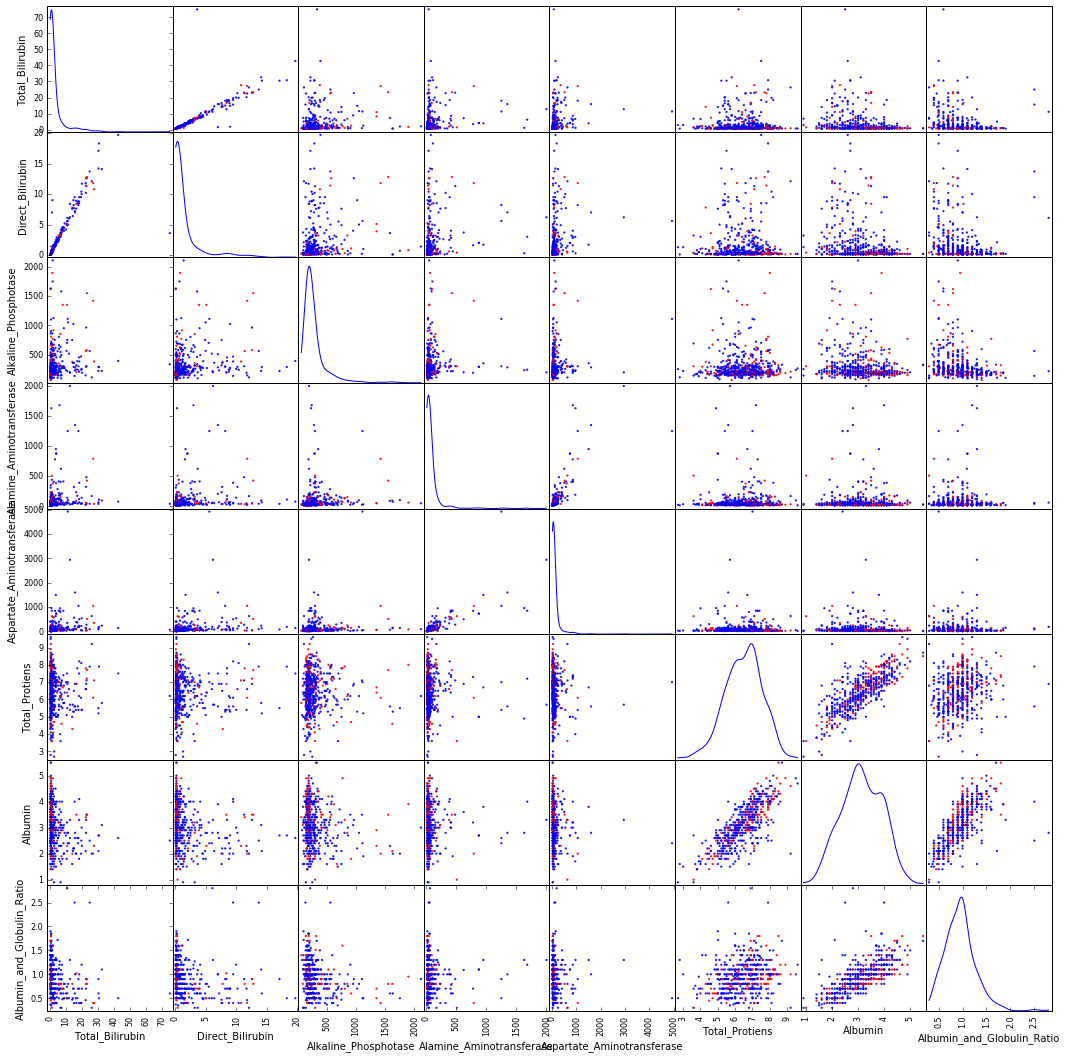

In [85]:
observables = data.iloc[:,1:10]
color_wheel = {'Female': "red", 'Male': "blue"}
colors = data["Gender"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.9, figsize = (18, 18), diagonal = 'kde');

In [86]:
##dummy variable
data.Gender = [1 if each == "Male" else 0 for each in data.Gender]

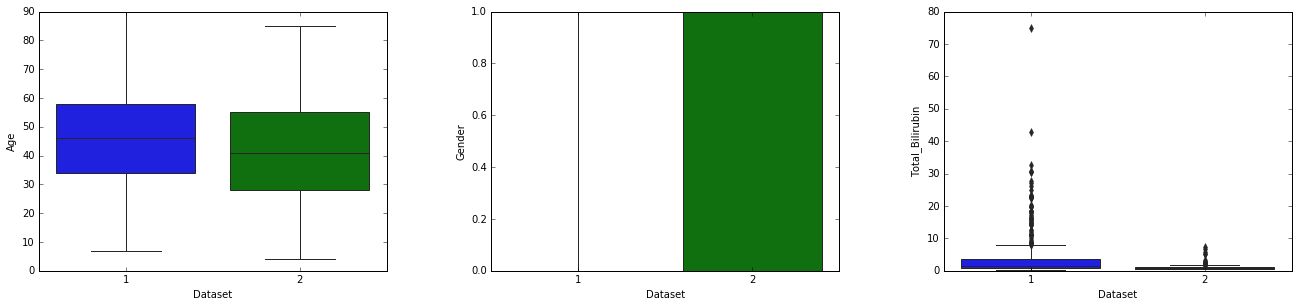

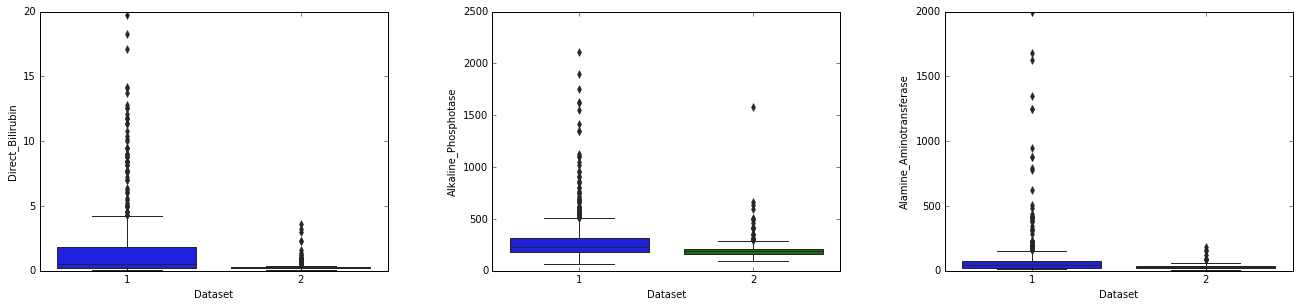

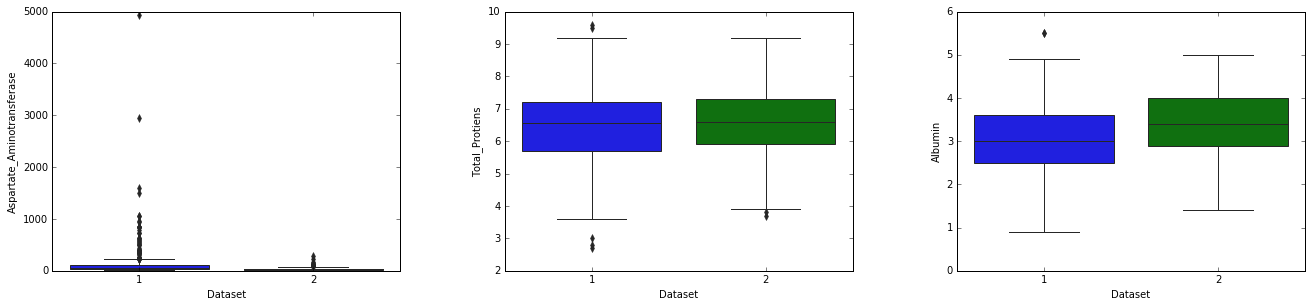

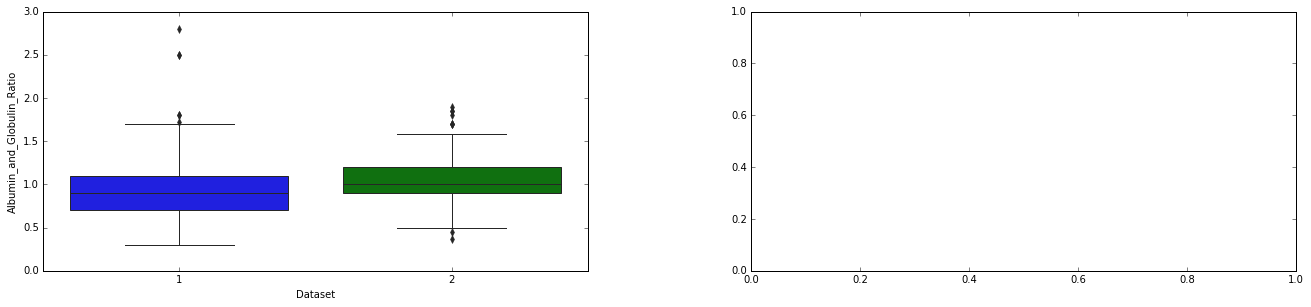

In [91]:

left  = 0.1  
right = 3    
bottom = 0.1 
top = 1      
wspace = 0.3  
hspace = 0.2   

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Age', data = data,   ax=axes[0])
sns.boxplot('Dataset', 'Gender', data = data,  orient='v' , ax=axes[1])
sns.boxplot('Dataset', 'Total_Bilirubin', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Direct_Bilirubin', data = data,  orient='v' , ax=axes[0])
sns.boxplot('Dataset', 'Alkaline_Phosphotase', data = data,  orient='v' , ax=axes[1])
sns.boxplot('Dataset', 'Alamine_Aminotransferase', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Aspartate_Aminotransferase', data = data,  orient='v' , ax=axes[0])
sns.boxplot('Dataset', 'Total_Protiens', data = data,  orient='v' , ax=axes[1])
sns.boxplot('Dataset', 'Albumin', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('Dataset', 'Albumin_and_Globulin_Ratio', data = data,  orient='v' , ax=axes[0])

In [92]:
# useful_data
useful_data = data.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(useful_data)

# Dimmension indexing
dimmensions  = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4),columns=useful_data.keys())
components.index = dimmensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variancce_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variancce_rations.index = dimmensions

print(pd.concat([variancce_rations, components], axis=1))

             Explained Variance  Gender  Total_Bilirubin  Direct_Bilirubin  \
Dimension 1              0.6278  0.0001           0.0050            0.0025   
Dimension 2              0.3170 -0.0001           0.0033            0.0017   
Dimension 3              0.0550 -0.0001          -0.0006           -0.0004   

             Alkaline_Phosphotase  Alamine_Aminotransferase  \
Dimension 1                0.2433                    0.4759   
Dimension 2                0.9697                   -0.1372   
Dimension 3               -0.0198                   -0.8687   

             Aspartate_Aminotransferase  Total_Protiens  Albumin  \
Dimension 1                      0.8452         -0.0001  -0.0002   
Dimension 2                     -0.2019         -0.0001  -0.0005   
Dimension 3                      0.4949          0.0004  -0.0006   

             Albumin_and_Globulin_Ratio  Dataset  
Dimension 1                     -0.0001  -0.0003  
Dimension 2                     -0.0003  -0.0002  
Dimensio

It can be observed that 62.78% variance is explained in dimension 1.Rest of the dimensions contribute less to the variance as compared to the first one.
In dimension 1 most of the feature weight is associated with Aspartate_Aminotransferase and Alamine_Aminotransferase.Thus these two attributes will be important for analysis.Attributes such as Total_Proteins and Albumin_and_Globulin_Ratio has very less weight associated with them.Further analysis will help us in dropping one of such attributes.

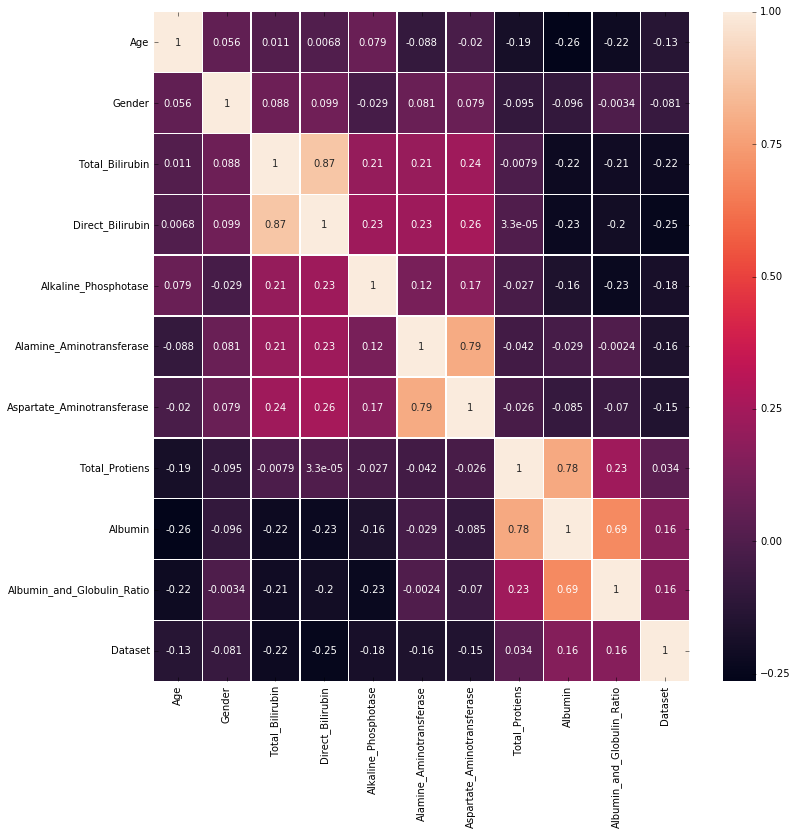

In [94]:
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,linewidths=.5, ax=ax)


## Classifcation and Prediction
### Choosing Classification Model
We would use KNN method of classification as the dataset is small and almost numerical. Also, PCA,correlation matrix and scatter matrix show that attributes are not correlated. Hence, decision trees would also make a good classfication model.
 


In [97]:
from sklearn.model_selection import train_test_split
x =  data.iloc[:,1:10]
X_train, X_test, y_train, y_test = train_test_split(x, data['Dataset'], test_size=0.20,random_state=5)

### KNN classifier

[0.772  0.7377 0.7709 0.7535 0.7655 0.7426 0.7708 0.7373 0.7621 0.7361
 0.7525 0.7343 0.7508 0.7377 0.7457 0.7238 0.7267 0.7115 0.7153 0.7189
 0.7368 0.7207 0.7434 0.7304]


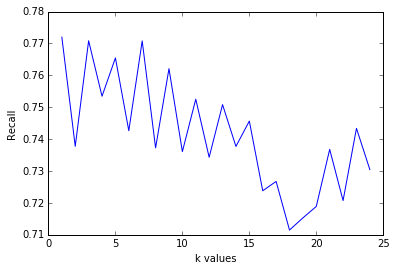

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
k_range=list(range(1,25))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='precision')
    k_scores.append(scores.mean())
print(np.round(k_scores,4)) 
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

From the above plot we can conclude that the optimal value of k is between 0 to 10.Therefore we take k=1 as it has the highest sensitivity.

### Classification Report

Confusion matrix
 [[60 24]
 [18 14]] 

Confusion matrix plot


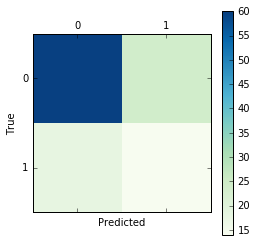

Classfication report
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        84
           2       0.37      0.44      0.40        32

   micro avg       0.64      0.64      0.64       116
   macro avg       0.57      0.58      0.57       116
weighted avg       0.66      0.64      0.65       116

Accuracy score
0.6379310344827587


In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

### Decision Trees

In [111]:
from sklearn.tree import DecisionTreeClassifier
# Fit training data
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Confusion matrix
 [[65 19]
 [20 12]] 

Confusion matrix plot


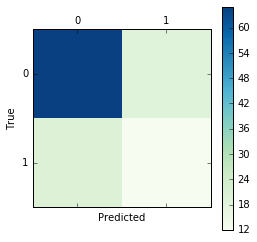

Classfication report
              precision    recall  f1-score   support

           1       0.76      0.77      0.77        84
           2       0.39      0.38      0.38        32

   micro avg       0.66      0.66      0.66       116
   macro avg       0.58      0.57      0.58       116
weighted avg       0.66      0.66      0.66       116

Accuracy score
0.6637931034482759


In [112]:
y_pred = classifier.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

ImportError: No module named 'sklearn.grid_search'